#Маркетплейс

##Задание 1
Менеджер сайта, предоставляющего независимым продавцам площадку для
продаж, решил провести АБ-тест, выбрав в качестве метрики время обработки
заказов продавцами. Для контрольной группы продавцов оставили предыдущий
интерфейс работы с заказами, а для тестовой группы внедрили интерактивный
дашборд заказов.

Полученные результаты времени обработки заказов в часах для тестовой и
контрольной групп представлены в csv-файлах time_order_processing_test.csv и time_order_processing_control.csv.

Проверьте гипотезу менеджера о том, что использование интерактивного
дашборда уменьшило время обработки заказов.

In [56]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [38]:
# Загрузка данных
control_group = pd.read_csv(
    "https://raw.githubusercontent.com/sergigusev/Datasets/main/time_order_processing_control.csv",
    sep=","
)
test_group = pd.read_csv(
    "https://raw.githubusercontent.com/sergigusev/Datasets/main/time_order_processing_test.csv",
    sep=","
)

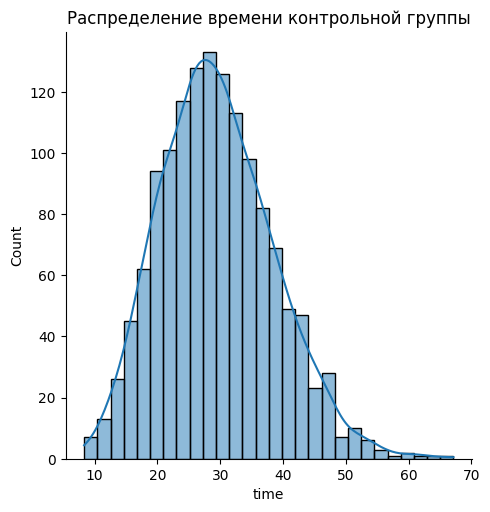

In [39]:
# Посмотрим на распределение контрольной группы
sns.displot(control_group, x="time", kde=True)
plt.gca().set_title('Распределение времени контрольной группы')
plt.show()

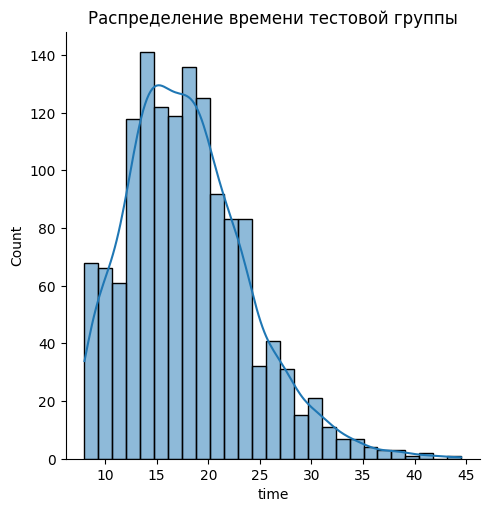

In [40]:
# Посмотрим на распределение тестовой группы
sns.displot(test_group, x="time", kde=True)
plt.gca().set_title('Распределение времени тестовой группы')
plt.show()

Можно сказать, что распределение времени контрольной группы является нормальным. В то время, как распределение тестовой группы является ассиметричным с правым концом (правая ассиметрия)

In [41]:
# Сравнеие стандартных отклонений
control_std = control_group['time'].std( )
print(control_std)
test_std = test_group['time'].std( )
print(test_std)

8.979887698975014
5.857844720387853


Разница между стандартными отклонениями двух выборок не существенна.

In [42]:
# Cреднее время обработки заказов для каждой выборки
mean_control_group = control_group['time'].mean()
mean_test_group = test_group['time'].mean()

Нулевая гипотеза **H_0: mean_control_group = mean_test_group**,
т.е. использование интерактивного дашборда не изменило время обработки заказов

Альтернативная гипотеза **H_1: mean_control_group > mean_test_group**,
т.е. использование интерактивного дашборда уменьшило время обработки заказов

In [43]:
# По условию даны две независимые выборки
# Тест проводится с помощью T-test'а Стьюдента
alpha = 0.05  # уровень статистической значимости

# Проведение T-теста для двух независимых выборок
results = st.ttest_ind(
    control_group['time'],
    test_group['time'],
    alternative = "greater"
)

print(f"Среднее время обработки заказов в контрольной группе: {mean_control_group:.3f}")
print(f"Среднее время обработки заказов в тестовой группе: {mean_test_group:.3f}")
print("Результаты T-теста:")
print(f"p-значение: {results.pvalue}")
print(f"T-статистика: {results.statistic}")

Среднее время обработки заказов в контрольной группе: 29.503
Среднее время обработки заказов в тестовой группе: 18.009
Результаты T-теста:
p-значение: 2.9949647128013707e-277
T-статистика: 40.01055525962125


In [44]:
# Проверка гипотез
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, так как использование интерактивного дашборда уменьшило время обработки заказов")
else:
    print("Не получилось отвергнуть нулевую гипотезу, так как использование интерактивного дашборда не изменило время обработки заказов")

Отвергаем нулевую гипотезу, так как использование интерактивного дашборда уменьшило время обработки заказов


##Задание 2

Этот же маркетплейс предоставил с 1 мая часто заказывающим клиентам
бесплатную доставку, действующую для всех заказов до конца календарного
месяца, если в этом месяце клиент уже сделал пять заказов (то есть начиная с шестого заказа).

В файле clients_orders.csv представлена информация о количестве заказов,
которое тысяча случайно отобранных часто заказывающих клиентов сделали в
апреле и мае.

Проверьте гипотезу о том, что клиенты стали делать больше заказов после
введения бесплатной доставки с шестого заказа.

In [23]:
# Загрузка данных
client_orders = pd.read_csv(
    "https://raw.githubusercontent.com/sergigusev/Datasets/main/clients_orders.csv",
    sep = ","
)

In [45]:
# Заказы клиентов по месяцам: за апрель и за май
client_orders_april = client_orders["orders_april"].sum()
client_orders_may = client_orders["orders_may"].sum()

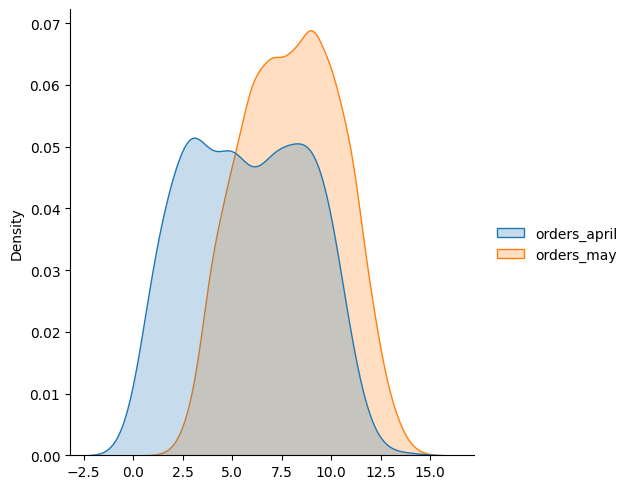

In [46]:
# Посмотрим на распределение заказов за апрель и за май
sns.displot(data=client_orders[['orders_april','orders_may']], kind="kde", fill=True)

На распределении видно, что в мае в целом увеличилось количество заказов на клиента

Нулевая гипотеза **H_0: client_orders_april = client_orders_may**, т.е. клиенты не стали делать больше заказов после введения бесплатной доставки с шестого заказа.

Альтернативная гипотеза **H_1: client_orders_april < client_orders_may**, т.е. введение бесплатной доставки с шестого заказа увеличило общее количество заказов.

In [47]:
# По условию даны две зависимые выборки (парная выборка)
# Тест проводится с помощью T-test'а Стьюдента
alpha = 0.05  # уровень статистической значимости

# Проведение T-теста для парной выбори
results = st.ttest_rel(
    client_orders["orders_may"],
    client_orders["orders_april"],
    alternative = "greater"
)

print(f"Всего заказов за Апрель: {client_orders_april}")
print(f"Всего заказов за Май: {client_orders_may}")
print("Результаты T-теста:")
print(f"p-значение: {results.pvalue}")
print(f"T-статистика: {results.statistic}")

Всего заказов за Апрель: 5762
Всего заказов за Май: 7982
Результаты T-теста:
p-значение: 2.8066025158955254e-64
T-статистика: 18.171999762294778


In [48]:
# Проверка гипотез
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, так как введение бесплатной доставки с шестого заказа увеличило общее количество заказов")
else:
    print("Не получилось отвергнуть нулевую гипотезу, так как клиенты не стали делать больше заказов после введения бесплатной доставки с шестого заказа.")

Отвергаем нулевую гипотезу, так как введение бесплатной доставки с шестого заказа увеличило общее количество заказов


##Задание 3

В файле vendors.csv представлена анонимизированная информация о
продавцах маркетплейса: тип продукции ( goods ) и время осуществления
продаж через этот маркетплейс ( experience ).

Переменная goods принимает значения:

clothes — одежда

electronics — электроника и техника

outdoor — товары для активного отдыха

beauty — косметика и товары для ухода

pets — товары для животных

Переменная experience принимает значения:

0-1 — до одного года продаж

1-3 — от одного до трёх лет продаж

3-5 — от трёх до пяти лет продаж

5- — от пяти лет продаж

Проверьте гипотезу о том, что стаж продаж на маркетплейсе не зависит от типа реализуемой продукции.

In [49]:
# Загрузка данных
vendors = pd.read_csv("https://raw.githubusercontent.com/sergigusev/Datasets/main/vendors.csv")

Нулевая гипотеза **H_0: стаж продаж** на маркетплейсе **не зависит от** типа реализуемой продукции.

Альтернативная гипотеза **H_1: стаж продаж** на маркетплейсе **зависит от** типа реализуемой продукции.

In [50]:
# Так как по условию даны две качественные переменные, то необходимо работать с таблицей сопряжённости
# Тест проводим при помощи Хи-квадрата

# Таблица сопряженности для переменных goods и experience
contingency_table = pd.crosstab(vendors['goods'], vendors['experience'])
contingency_table

experience,0-1,1-3,3-5,5-
goods,,,,
beauty,40,65,22,26
clothes,104,129,42,46
electronics,68,67,29,31
outdoor,36,46,23,26
pets,13,17,4,5


In [51]:
alpha = 0.05  # уровень статистической значимости

# Проведение Chi-square test'а для таблицы сопряжённости
contingency_table = pd.crosstab(vendors['goods'], vendors['experience'])
results = chi2_contingency(contingency_table)
print("хи-квадрат стастистика:", results.statistic)
print("p-value:", results.pvalue)
print("степеней свободы:", results.dof)
print("рассчитанные ожидаемые значения:\n", results.expected_freq)

хи-квадрат стастистика: 9.177972185008638
p-value: 0.687658762327187
степеней свободы: 12
рассчитанные ожидаемые значения:
 [[ 47.59594756  59.08462455  21.88319428  24.43623361]
 [ 99.85816448 123.96185936  45.91179976  51.2681764 ]
 [ 60.66150179  75.30393325  27.89034565  31.14421931]
 [ 40.75208582  50.58879619  18.73659118  20.92252682]
 [ 12.13230036  15.06078665   5.57806913   6.22884386]]


In [52]:
# Проверка гипотез
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, так как стаж продаж на маркетплейсе зависит от типа реализуемой продукции")
else:
    print("Не получилось отвергнуть нулевую гипотезу, так как стаж продаж на маркетплейсе не зависит от типа реализуемой продукции.")

Не получилось отвергнуть нулевую гипотезу, так как стаж продаж на маркетплейсе не зависит от типа реализуемой продукции.


<Axes: xlabel='goods'>

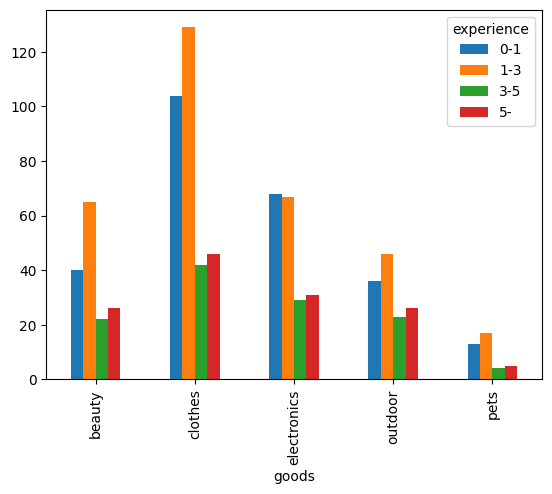

In [54]:
# Посмотрим на распределение стажа продаж по типу реализуемой продукции
contingency_table.plot(kind='bar')

Судя по распределению стаж продаж на маркетплейсе действительно не зависит от типа реализуемой продукции

##Задание 4

Постройте 90%-е доверительные интервалы по выборкам из задания 1 для
среднего времени обработки заказа продавцами, использующими и не использующими интерактивный дашборд.

In [57]:
# Доверительный интервал
confidence_level = 0.9
# Критическое значение
alpha = 0.1

# Расчёт доверительного интервала производится по формуле:
# среднее значение +/- критическое значение * стандартное отклонение / квадратный корень из размера выборки

# Средние и стандартные отклонения для двух выборок
mean_control_group = control_group['time'].mean()
std_control_group = control_group['time'].std()

mean_test_group = test_group['time'].mean()
std_test_group = test_group['time'].std()

# Размер выборок
n_control_group = len(control_group)
n_test_group = len(test_group)

# Вычисление критического значения Z_а/2 для 90% уровня доверия
z_control_group = st.t.ppf((1 + confidence_level) / 2, n_control_group - 1)
z_test_group = st.t.ppf((1 + confidence_level) / 2, n_test_group - 1)

# Расчёт доверительных интервалов выборок
confidence_interval_low_control = mean_control_group - z_control_group * (
    std_control_group / np.sqrt(n_control_group)
)
confidence_interval_high_control = mean_control_group + z_control_group * (
    std_control_group / np.sqrt(n_control_group)
)

confidence_interval_low_test_group = mean_test_group - z_test_group * (
    mean_test_group / np.sqrt(n_test_group)
)
confidence_interva_high_test_group = mean_test_group + z_test_group * (
    mean_test_group / np.sqrt(n_test_group)
)

In [59]:
print("90% доверительный интервал для среднего времени обработки заказа без использования интерактивного дашборда:")
print(f"({confidence_interval_low_control:.3f}, {confidence_interval_high_control:.3f})")
print("90% доверительный интервал для среднего времени обработки заказа с использованием интерактивного дашборда:")
print(f"({confidence_interval_low_test_group:.3f}, {confidence_interva_high_test_group:.3f})")

90% доверительный интервал для среднего времени обработки заказа без использования интерактивного дашборда:
(29.107, 29.899)
90% доверительный интервал для среднего времени обработки заказа с использованием интерактивного дашборда:
(17.215, 18.803)


In [61]:
# Также можно построить доверительный с помощью функции st.norm.interval()
# - функции для вычисления доверительного интервала для нормального распределения
interval_con = st.norm.interval(
    confidence=0.9, loc=np.mean(control_group['time']),
    scale=st.sem(control_group['time'])
)
interval_test = st.norm.interval(
    confidence=0.9, loc=np.mean(test_group['time']),
    scale=st.sem(test_group['time'])
)
print(f'90% доверительный интервал для контрольной группы: ({(interval_con[0]):.4f} , {(interval_con[1]):.4f})')
print(f'90% доверительный интервал для тестовой группы: ({(interval_test[0]):.4f} , {(interval_test[1]):.4f})')

90% доверительный интервал для контрольной группы: (29.1071 , 29.8986)
90% доверительный интервал для тестовой группы: (17.7510 , 18.2673)


То есть, в 90 процентах случаев данные доверительные интервалы будут включать истинное среднее значение времени обработки заказа.